In [36]:
# Logistic Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values   # since we only want to find a correlation between age, salary and purchasing an SUV
y = dataset.iloc[:, 4].values

#dataset

In [37]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [38]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix  #confusion matrix is just a function, not a class. A class is written having the first letter of each word as capitalized.
cm = confusion_matrix(y_test, y_pred) # Check the documentation to understand the parameters on the confusion matrix, pretty neat actually.
cm # Checking the results, we notice the following:

array([[65,  3],
       [ 8, 24]])

# Checking the results of the confusion matrix, we notice the following:

1. True negatives: 65, We predicted no, and they haven't purchased the SUV
2. True positives: 24, these are cases in which we predicted yes (they purchased the SUV), and they did purchase the SUV.
3. False negatives:8,  We predicted no, but they actually purchased the SUV. (Also known as a "Type II error.")
4. False positives: 3, We predicted yes, but they haven't actually purchased the SUV . (Also known as a "Type I error.")


# Having the following confusion matrix in mind, check the definitions below:

* TN = 50
* FP = 10
* FN = 5
* TP = 100

# Other related terms:

* Accuracy: Overall, how often is the classifier correct?
    (TP+TN)/total = (100+50)/165 = 0.91
* Misclassification Rate: Overall, how often is it wrong?
    (FP+FN)/total = (10+5)/165 = 0.09
    equivalent to 1 minus Accuracy
    also known as "Error Rate"
* True Positive Rate: When it's actually yes, how often does it predict yes?
    TP/actual yes = 100/105 = 0.95
    also known as "Sensitivity" or "Recall"
* False Positive Rate: When it's actually no, how often does it predict yes?
    FP/actual no = 10/60 = 0.17
* Specificity: When it's actually no, how often does it predict no?
    TN/actual no = 50/60 = 0.83
    equivalent to 1 minus False Positive Rate
* Precision: When it predicts yes, how often is it correct?
    TP/predicted yes = 100/110 = 0.91
* Prevalence: How often does the yes condition actually occur in our sample?
    actual yes/total = 105/165 = 0.64


# A couple other terms are also worth mentioning:

* Positive Predictive Value: This is very similar to precision, except that it takes prevalence into account. In the case where the classes are perfectly balanced (meaning the prevalence is 50%), the positive predictive value (PPV) is equivalent to precision. (More details about PPV.)
* Null Error Rate: This is how often you would be wrong if you always predicted the majority class. (In our example, the null error rate would be 60/165=0.36 because if you always predicted yes, you would only be wrong for the 60 "no" cases.) This can be a useful baseline metric to compare your classifier against. However, the best classifier for a particular application will sometimes have a higher error rate than the null error rate, as demonstrated by the Accuracy Paradox.
* Cohen's Kappa: This is essentially a measure of how well the classifier performed as compared to how well it would have performed simply by chance. In other words, a model will have a high Kappa score if there is a big difference between the accuracy and the null error rate. (More details about Cohen's Kappa.)
* F Score: This is a weighted average of the true positive rate (recall) and precision. (More details about the F Score.)
* ROC Curve: This is a commonly used graph that summarizes the performance of a classifier over all possible thresholds. It is generated by plotting the True Positive Rate (y-axis) against the False Positive Rate (x-axis) as you vary the threshold for assigning observations to a given class. (More details about ROC Curves.)
    

# Other notes

- ROC curve visualizes all possible thresholds while Misclassification rate is the error rate for a single threshold.
- A classifier that does a very good job separating the classes, will have an ROC curve that hugs the upper left corner of the plot. Conversely, a classifier that does a very poor job on separating the classes, will have an ROC curve close to the diagonal line. The diagonal line implies a classifier that does no better than random guessing.
- If you want to quantify the ROC curve so that you can give a better score to a curve that hugs the upper left corner compared to the diagonal, you should calculate the area under the curve which is called AUC. A random guessing classifier (diagonal curve) has  AUC =0.5 while a perfect classifier (hugs upper left corner) has AUC = 1.
- All the AUC metric cares about is how well your classifier separated the two classes. You can thing of the AUC as representing the probability that a classifier would rank a randomly chosen positive observation higher than a randomly chosen negative observation. Hence, AUC is a useful metric even when your classes are highly unbalanced.
- Choosing a classification threshold is a business decision; minimize False Positive Rate or maximize True Positive Rate?



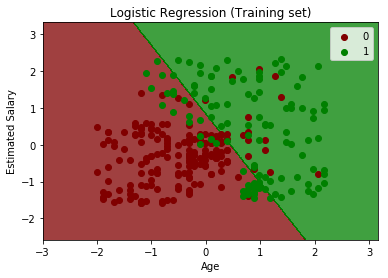

In [42]:
# ---------------------------------------------Visualising the Training set results-----------------------------------------

# Below, we plot the predicted regions: the 'maroon' region catches those that don't buy an SUV while the 'green' region catches
# the SUV buyers.Those regions are being generated from the classifier.The points show the true values.


# Just a quick note on how to create the graph below: Apply your logistic regression to every pixel on the plot; even to points
# that are not included into your dataset.


from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('maroon', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('maroon', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [43]:
# The fact that the prediction boundary (boundary between the two prediction regions) is a straight line indicates that the logistic
# regression classifier is a linear classifier. When we build non-linear classifiers, the prediction boundary will not be a straight
# line anymore.
# Seeing the results above, the Marketing team can focus on sending email campaigns/ads to the region on the right.

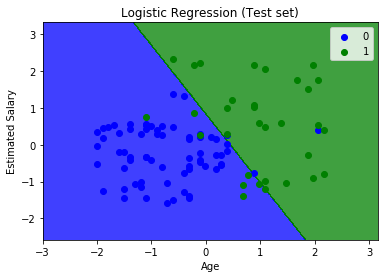

In [44]:
# ----------------------------------------------Visualising the Test set results --------------------------------------------
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()